## Quantitative Methods 2:  Data Science and Visualisation

## Workshop 5: Working with Data and Basic Statistics

This week, we'll look mainly at artifically generated data to understand a couple of different forms, and what statistics we might apply to understand them.

### Aims:

- Choosing appropriate summary statistics for varying distributions

- Understanding:

    - Properties of Gaussians

    - Moments and more complex distributions

    - Power laws

    - Bi-modal and multi-modal distributions

### Preamble

Statistical data is frequently unpredictable, in the sense that we can't say for certain where our data points will lie; flipping a coin multiple times, we don't know what the next coin flip will bring. But more generally, we can start to see patterns emerging, even if we can't make perfect predictions of each outcome.


Some randomness is more predictable than others, though. Let's select a random member of the UK population and measure their height. We don't know what this will be , but we know it's unlikely to be more than 3m, say, or less than 1m. The details of this range, and how more likely a 1m person is than a 3m is, depends on the *statistical distribution*.

For intermediate values, we can estimate the likelihood that we'll encounter a particular height, because even 1.5m or 2m is less likely than the mean. Let's choose women, because the difference between sexes are big; English women are about 1.63m tall on average, and many are within 6cm of this.

I don't have this data, so I'm going to generate some fake data which has similar properties. I'll start by importing the libraries I need: matplotlib (for graphs), pandas (for data), numpy (for maths) and random (for generating random numbers):

In [55]:
#This is a comment - python does not try to execute it

#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pylab
#import pandas as pd
import numpy
import random
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)


## Alias Grace

The first thing to notice is that I'm using an **alias** for matplotlib.pyplot -  it's a bit ungainly, so I'm using "plt" in its place. That's just to make the coding easier. I'll do the same for some of the other libraries as we go through - this isn't necessary, but online examples frequently use "pd" for "pandas" (for example), so it can be useful to use these. The way it works is pretty simple - now I've used "plt" as my alias for matplotlib.pyplot, I can just say "plt.*command()*" whenever I need to use functions from that library.

Ok, so in this next block I'm going to generate some *synthetic* data which will be called "heights":


Text(0.5,1,'Fake Height Data')

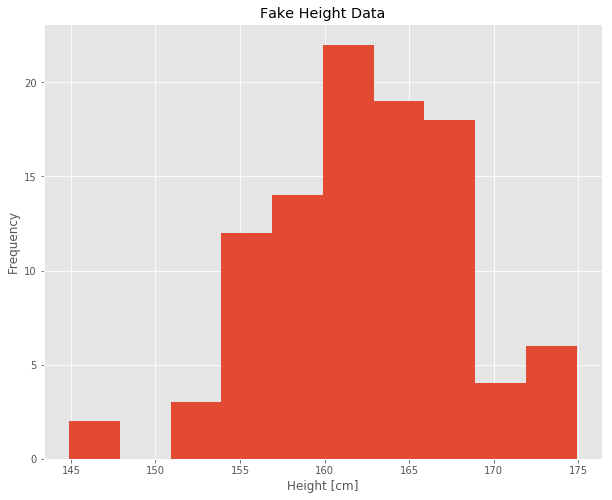

In [68]:
bins = 10
sample = 100
mean = 163
sd = 6

heights = sd * numpy.random.randn(sample) + mean


#now we plot this fake data
plt.hist(heights)
plt.xlabel('Height [cm]')
plt.ylabel('Frequency')
plt.title('Fake Height Data')

## At peace with arguments
These functions (for drawing graphs, adding axes, etc) take *arguments*. For example, *xlabel()* "takes" a text value which tells it what to write - this is a *required argument*. *hist()* takes required arguments like *height*, and *optional arguments* like *bins* (how many bins to use) and *histtype* (how the graph appears). 

## Exercise: changing arguments
What effect does removing these arguments have? What if you change their values? Use the hist() documentation page to understand what other effects you can create.


Text(0.5,1,'Fake Height Data')

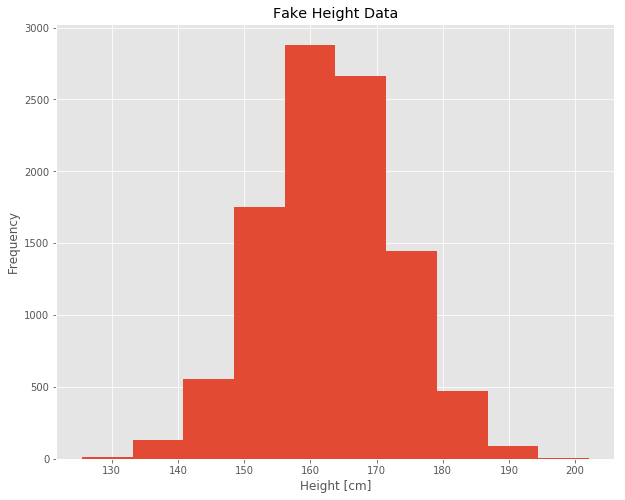

In [58]:
bins = 100
sample = 10000
mean = 163
sd = 10

heights = sd * numpy.random.randn(sample) + mean


#now we plot this fake data
plt.hist(heights)
plt.xlabel('Height [cm]')
plt.ylabel('Frequency')
plt.title('Fake Height Data')

# Note that I've not used real data, I've just sampled randomly from a curve which represents the spread of heights - so the x axis is height, and the y axis is how frequent, or equivalently how likely, that height is to occur. In the real world, more often than not, you will have to figure out what this curve is.

**Important Side Note**: Always, **always** label your data and axes

Ok, what is this curve I've used? 

# The Gaussian

It's the most common curve in statistics, the Gaussian aka the Normal Distribution aka the Bell Curve, and mathematically, it looks a bit like this†:

$ G(h) = exp(-(h-\mu_h)^2/2\sigma^2) $

This looks somewhat complex, but can be unpacked - indeed, some of this material will be familiar from your first year QM class.

1) The *exp* means an exponential; this tends to take whatever is in the brackets and make it more *dramatic*. Small changes are greatly amplified.

2) The negative sign means that the number always gets smaller – when whatever is in the brackets is zero, $G(h)=1$; for all other values of $h$, the number is smaller.

3) There is only one value of $h$ which means that the stuff in the brackets is 0 and it's when $h=\mu_h$.  
$\mu_h$ is the *mean* of the distribution (the average value), and in this case marks the centre. 

4) This is a bit less obvious, but as $\sigma$ gets bigger, the function decreases more slowly as $h$ moves away from the mean; so a bigger $\sigma$ means a wider peak. $\sigma$, then, is a useful measure of width of a function. $\sigma$ is called the *standard deviation*.

5) This is also not immediately obvious, but all the squares mean that the distribution is symmetric about the mean. 

† **Extension**: mathematicians will notice that "real" Gaussians have a constant factor out front, like $G_0exp(-(h-\mu_h)^2/2\sigma^2)$ - they will also remember that this is a scaling or normalisation factor, and doesn't affect the shape of the curve. You may also notice that on the graph above, the curve doesn't have a maximum value of 1 - that's due to this constant factor. Changing the number of samples will change the maximum, unless we *normalise* it somehow, but we're not worrying about that at the moment.

# Translating maths into code

We're using some packages in Python to generate points drawn from a Gaussian curve, and I've used parameters to represent the mean and standard deviation written mathematically above. So $\mu$ in the above equation is the variable "mean" in my code and $\sigma$ (the standard deviation) becomes "sd".

The variable "sample" tells us how many times we sample from this distribution - this is equivalent to how many people we ask their height. Finally, "bins" determines the counting interval. We'll come back to that.

# Exercise: counting heads
By modifying variables in the code above, create and plot a distribution of heights for *men* in the USA. Use of wikipedia and the internet is allowed. Social media is not.

How many men in America are average height? (Hint: think about the "sample" variable)

*Extension:* How many men in the USA are within 7cm of the mean?

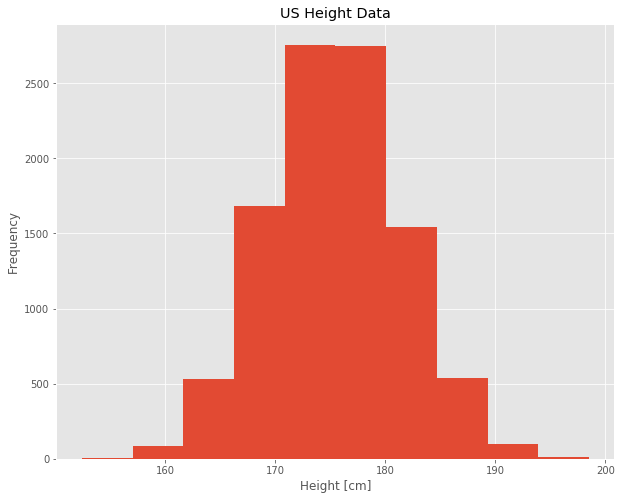

In [69]:
bin = 10
sample = 10000
mean = 175.4
sd = 6

heights = sd * numpy.random.randn(sample) + mean

plt.hist(heights)
plt.xlabel('Height [cm]')
plt.ylabel('Frequency')
plt.title('US Height Data')
plt.show()

# In the bin

Slightly more subtly, the bin size might affect our answers to some of these questions. In order to create a distribution, we need to *bin* data to create the graph that we've created - a *histogram* which we expect to reflect the probability mass function. If I give you a string of heights (1.1, 1.5, 1.6, 1.2, 1.8, 1.4, 1.0, 1.55, 1.74, etc) you can probably see that they cluster around 1.5 or thereabouts, but to graph them as a histogram, you need to choose a bin size and range. Let's say we choose 10 bins, starting at 1m and each bin is 0.1m bigger. So if the height h is 1.0 $\leq$ h < 1.1, it goes into the first bin, if 1.1 $\leq$ h < 1.2 in the second and so on. For this data, we'd see one entry in the first bin, one in the second, a few around the middle and only one in the higher echelons.

This is pretty basic and you're probably familiar with it. But you need to choose the number of bins appropriately for the data set - and that's very sensitive to the number of samples you have.

# Exercise: Keep Gaussians Tidy

In the above code, increase the number of bins to 1000 - what do you notice?

Reduce the number of bins to 10 - what happens now? What's causing this effect?

Reduce the number of samples to 1000. What affect does this have on the histogram?

How can you use this information for plotting and binning data?

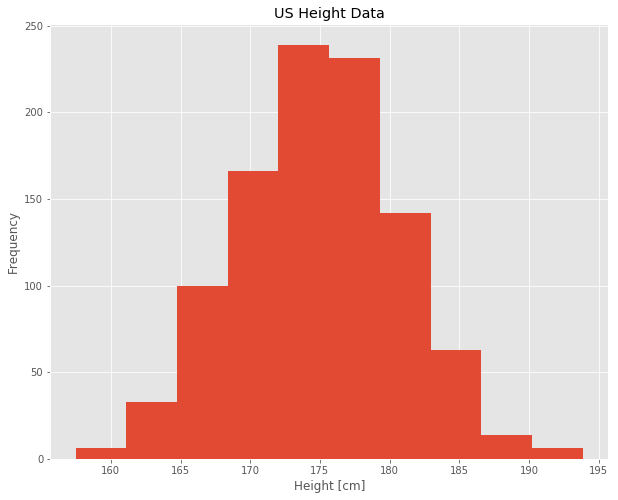

In [70]:
bin = 10
sample = 1000
mean = 175.4
sd = 6

heights = sd * numpy.random.randn(sample) + mean

plt.hist(heights)
plt.xlabel('Height [cm]')
plt.ylabel('Frequency')
plt.title('US Height Data')
plt.show()

*Extension*: to find more about the function used to sample these random numbers above, take a look at the Python documentation: http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html)

# Some Normal Behaviours

Let's look at the mean and standard deviation on the graph. We can calculate the mean and standard deviation of our (synthetic) dataset a by using the np.mean() and np.std() methods. 

Recall that the . notation means we're using a method from "inside" the numpy library.

Text(0.5,1,'Fake Heights')

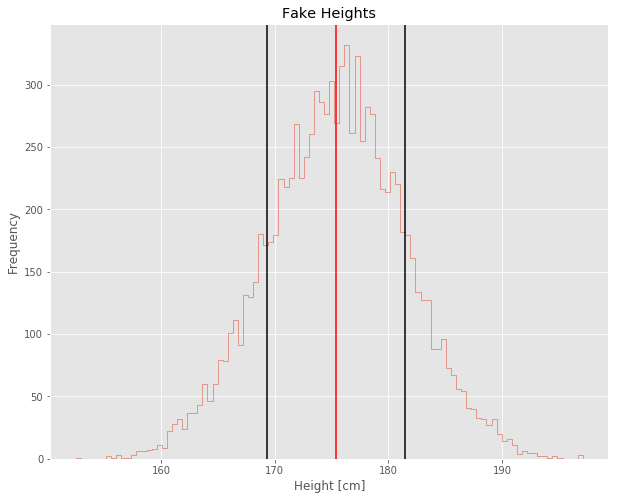

In [62]:
#as we did before...
plt.hist(heights, bins, histtype='step')
#draw the mean
plt.axvline(numpy.mean(heights), color = 'r')
sd = numpy.std(heights)
#draw mean + one s.d.
plt.axvline(numpy.mean(heights) + sd, color='k')
#draw mean - one s.d.
plt.axvline(numpy.mean(heights) - sd, color = 'k')
plt.xlabel('Height [cm]')
plt.ylabel('Frequency')
plt.title('Fake Heights')

Gaussians have some nice standard properties - for example, 68% of the data lies within one standard deviation of the mean. That means in our example above, 2/3 of women in the UK are between 1.57m and 1.69m tall. With a Gaussian, 95% of data is within two standard deviations - so 95% of women in the UK are at least 1.51m tall, and shorter than 1.75m. So this starts to answer some of our questions we posed initially - from a random sample, there is a 1 in 40 chance of a woman in the uk being taller than 1.75m. **How did I arrive at that figure?**

Let's also plot the *median* of the Gaussian:

Text(0.5,1,'Fake Heights')

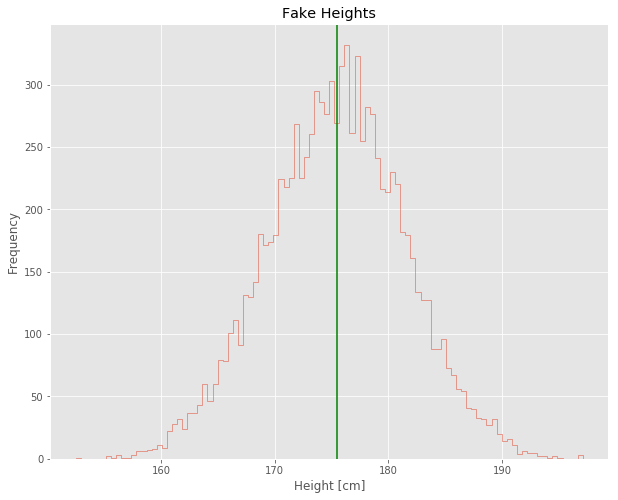

In [63]:
#as we did before...
plt.hist(heights, bins, histtype='step')
#draw the median
plt.axvline(numpy.median(heights), color = 'g')
plt.xlabel('Height [cm]')
plt.ylabel('Frequency')
plt.title('Fake Heights')

# Question: 
Why is the mean the same as the mean (and the mode)?

In [ ]:
Because it is normally distributed

Not all probability distributions follow the same logic, though - sometimes a sample is possible - even likely - even if it is dozens of times the mean, which for height would be tens of metres tall. More generally, we can start to unpick the shape of a probability curve using *moments*.

# Asymmetric Distributions

We won't talk about how we decide what the best fit for a dataset is - suffice it to say that a Gaussian doesn't always fit the bill. In those cases, the general curve we're dealing with will have a more complex form.

(*Sometimes we can know that from the underlying process generating the data - other times we don't, and it's analysing the shape of the data that tells us*)

Text(0,0.5,'Frequency')

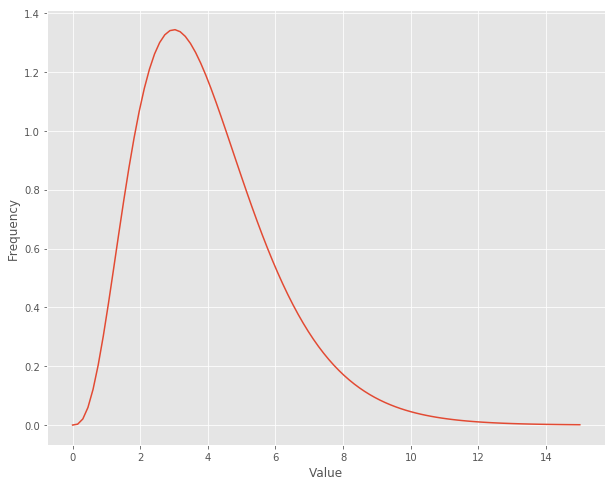

In [64]:
x_val= numpy.linspace(0,15,100)
y_val = (x_val**3)*numpy.exp(-x_val)
plt.plot(x_val,y_val)
plt.xlabel('Value')
plt.ylabel('Frequency')

How do we characterise a dataset which is complex, asymmetric, or we don't know the underlying form?

Magic Moments
=================

Without going into the mathematical detail yet, you can think about moments as being increasingly nuanced ways of describing distributions. There are an infinite number of them, but you can understand the first few inituitively. 

0th moment
----------

0th moment is just area under the curve. In this case it would just be the number of people sampled. It doesn't tell us much.

1st moment
----------

1st moment is a central "tendency" or average value of the distribution. In a Gaussian, the mean (average) $\mu$ is the average and the centre. But there are other ways of representing this characteristic, like mode or median, as we will see.

2nd moment
----------

Second moment represents the *width* or *spread* of the curve. $\sigma$ is calculated from the second moment, and in a Gaussian represents the width of the curve. Interquartile range is another way of doing this, or half-life. 

3rd moment
----------

The third moment is related to how *asymmetrical* a curve is, and the usual way to quantify this is *skewness*. A Gaussian is symmetric, so its skewness is zero. Actually, all moments apart from 0, 1 and 2 are zero for a Gaussian.

4th moment
----------

The standard way to calculate a fourth moment is *Kurtosis*. This is a measure of how "peaky" or "taily" a curve is. It's a bit harder to visualise what we're on about at this point, but it's worth remembering that a Gaussian has a Kurtosis of 0, so isn't very "taily".

Other moments
-------------

It's harder to interpret what they mean, but an arbitrary probability distribution may need an *infinite* series of moments to be described correctly. Gaussians are unusual in that they require only two parameters to describe them; if your data looks Gaussian, that makes life easier in many ways.

**Extension**: there are distributions which are simple to write down that nevertheless are described by an infinite series of moments; and some, like the Lorentzian, are quite nice functions that have infinite values for most of their moments.

## Recap: The Median

The *median* is different from the mean. The median of a data set is an element that seperates the higher half of the data from the lower half. For example, the median of $A = \left \{1,2,3,4,5\right \}$ is 3, and 3 is also the median of $B = \left \{1,2,3,9,10\right \}$. 
When a data set has an even number of members like $C = \left \{1,2,3,4\right \}$, the median is defined as the average of the top lower half and the lower top half, so the median of C is (2+3)/2=2.5 . 

**Advanced**: How did we define the median from a distribution (hint: consider area under curve and what it means)? What about quartiles? What about deciles? What are these quantities?

## Exercise  
Under which conditions is the median equal to the mean? (hint: look at the normal distribution - but think more broadly abouting how "counting" and "area under curve" are related in histograms).

In [ ]:
when the central bar at the middle is the tallest

## Exercise 
Construct a set of 5 numbers such that the median is half the value of the mean. 

In [ ]:
[1,2,5,12,30]

## Power Laws

Another type of important distributions are **power law** distributions. When the probability of a variable to take the value of $x$ is roughly
$\frac{1}{x^k}$ we say that $x$ has a power law distribution with exponent $k$.

For instance let's plot a power law function with exponent 3. 

We start off by generating an array of 100 numbers between 1 and 10; numpy.linspace() lets us do this (here is the documentation if you want to find out more: http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

(1, 5)

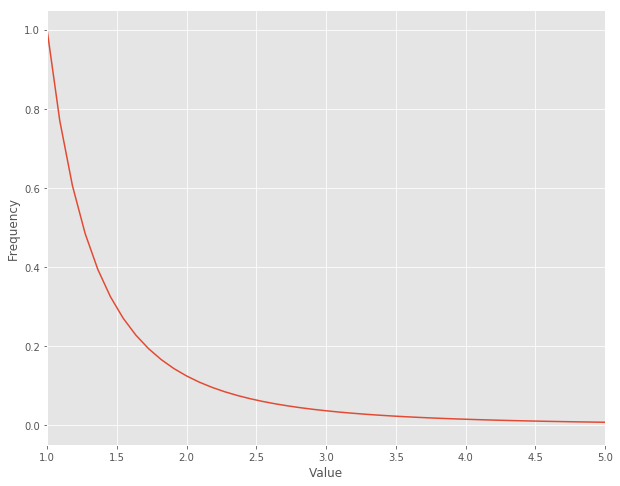

In [65]:
x_val= numpy.linspace(1,10,100)
#** is "to the power of" in Pythonese
y_val = 1/x_val**3
plt.plot(x_val,y_val)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(1,5)

An important class of power law distributions are called **Pareto** type distributions. Consider for instance, the distribution of income in a city. We will find that about 20% of the population has 80% of the wealth, this is also known as a 80:20 law. 

Text(0,0.5,'Frequency')

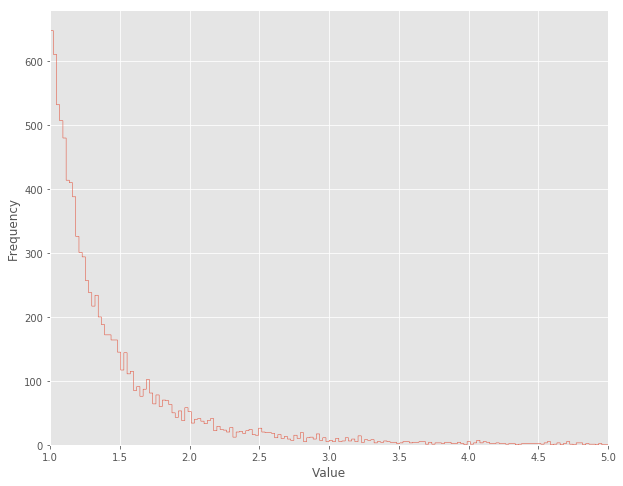

In [66]:
sample = 10000
exponent = 3

bins = 1000


y = 1 + numpy.random.pareto(exponent, sample)

plt.hist(y, bins, histtype='step')
plt.xlim((1, 5))
plt.xlabel('Value')
plt.ylabel('Frequency')

## Exercise: 
Add lines showing the mean, mode and median to the above graph, and comment on this with a box of markdown.

Text(0,0.5,'Frequency')

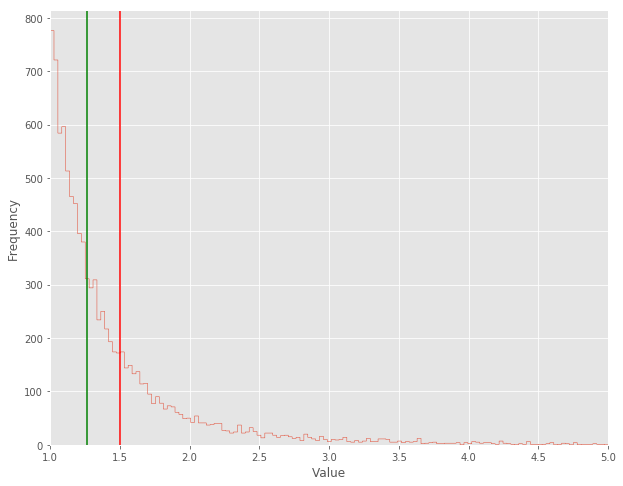

In [97]:
sample = 10000
exponent = 3

bins = 1000

y = 1 + numpy.random.pareto(exponent, sample)

plt.axvline(numpy.median(y), color = 'g')
plt.axvline(numpy.mean(y), color = 'r')
plt.hist(y, bins, histtype='step')
plt.xlim((1, 5))
plt.xlabel('Value')
plt.ylabel('Frequency')

## Comments:
We plotted the mean, mode and median of the distribution...

## Extension: Quantifying Datasets Which Cover a Wide Range of Values.
Objects like the mean present a problem for power laws - in some cases, they diverge. So, for the mathematicians, if the exponent is 1, we can approximate the mean by

$\mu = \int_0^{\infty}dx \frac{1}{x}*x = \int_0^{\infty}dx = \infty$!

which gives a nonsensical value. Larger exponents (larger than 2) ensure this doesn't occur - but what sense does the mean make when there are people earning 10, 100 or 1000 times that mean value?

When datasets cover many orders of magnitude (here from 33 to 2090), we may need to think about *geometrical* methods for understanding its properties. For the mean, we might consider the *geometrical mean*, achieved by mutiplying the 100 values together and taking the 100th root. To understand the width, we might use a half-life type measure. Half-life is the "time" it takes for a radioactive source to reach half its current level of radioactivity; but we can think about applying this to other situations, where "time" is replaced by "percentile" and "radioactivity" is replaced by "income", for example.

## Extension: Bimodal Distributions

Sometimes distributions are *Bimodal* or multimodal. What this literally means is that they have multiple "modes" - most popular values - i.e. peaks. In these cases, mean may not be the best measure and we may need to think about these two (or larger number of) peaks relates to different segments of our sample or population.

22


Text(0,0.5,'Frequency')

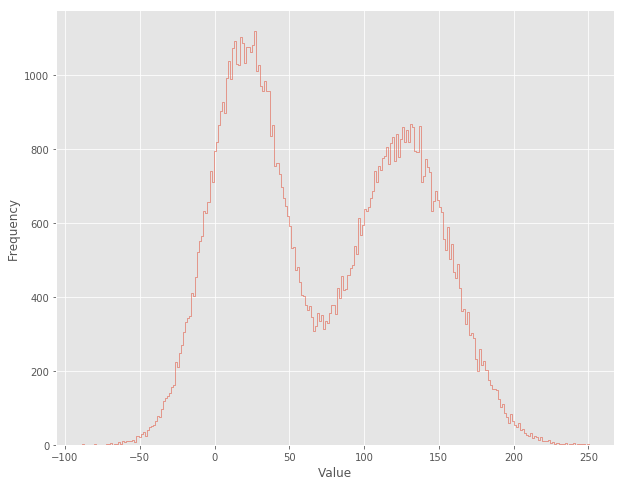

In [67]:
sample = 100000
a = 25 * numpy.random.randn(sample) + 20
for i in range(sample/2):
    a[i] = a[i]*1.3+100
plt.hist(a, 250, histtype='step');
plt.xlabel('Value')
plt.ylabel('Frequency')

## Exercise: 

Plot the mean and median for the above graph. What might be better statistics? How might you find them?

Text(0,0.5,'Frequency')

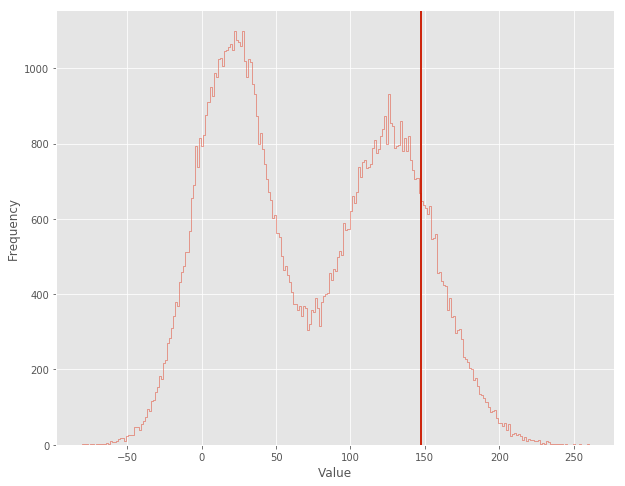

In [101]:
sample = 100000
a = 25 * numpy.random.randn(sample) + 20
for i in range(sample/2):
    a[i] = a[i]*1.3+100
plt.hist(a, 250, histtype='step');
plt.axvline(numpy.median(a[i]), color = 'g')
plt.axvline(numpy.mean(a[i]), color = 'r')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
perhaps we can normailse the data so we can create normal distribution